<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
7. Bölüm - Veri Bilimi İçin İstatistik (208-211. videolar) - Vahit Keskin anlattı. </font>

## İş Uygulaması: ML Modelinin Başarı Testi

**Bağımsız İki Örneklem T Testi**

### İçindekiler

**Problem**

**Bağımsız İki Örneklem T Testi**
- Veri Seti
- Varsayım Kontrolü *(Normal dağılım ve Varyans Homojenliği)*
    1. Normallik Varsayımı *(Shapiro-Wilks)*
    2. Varyans Homojenliği Varsayımı *(Levene Testi)*
- Bağımsız İki Örneklem T Testi Uygulama

**Nonparametrik Bağımsız İki Örneklem T Testi** *(Varsayımlar sağlanmazsa)*
- MannWhitneyu Testi

## <font color='black'> Problem </font>

Nasıl bir problemimiz var? Bir makine öğrenmesi modeli geliştirilmiş ve bu makine öğrenmesi modeli canlı sisteme entegre edilmiş. Makine öğrenmesi modelinin başarısı test edilmek isteniyor. Bunlar literatürde A/B testi olarak geçiyor. A eski sistemi ifade ediyor, B ise makine öğrenmesi modeliyle önerilerde bulunan yeni sistemi ifade ediyor. 

**Problem:**

Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı bir fark olup olmadığı test edilmek isteniyor. 

Ne yapıyor bu makine öğrenmesi projesi? İnsanlara ürün öneriyor. Bir eski sistem var, bu sistemde insanlar ürünleri olduğu gibi görüyor. Bir de makine öğrenmesinin ürettiği tahminlerle insanlara ürünler gösteriliyor. 

**Detaylar**

- Model geliştirilmiş ve web sitesine entegre edilmiş.
- Online bir örnekleme tekniği izlenerek site kullanıcıları belirli bir kurala göre ikiye bölmüş olsun.
- Bu kullanıcıların A grubuna eski sisteme göre ürünler gösterilirken B grubuna da yeni sisteme göre ürünler gösteriliyor.
- Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

Problem şu: attığımız taş ürküttüğümüz kurbağaya değdi mi? 8 ay boyunca yatırımlarda bulunduk, emek verdik, toplantılar yaptık, zaman ayırdık, insan istihdam ettik ve sonucunda bir makine öğrenmesi işi çıktı. Makine öğrenmesi modellerinin bile tahminlerinin ortaya çıkardığı değerlerinin başarısı ancak test yapılarak anlaşılabilir. 

Hipotezimizi kuruyoruz:

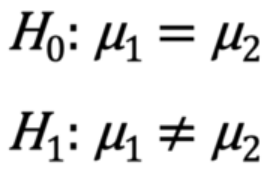

**H0 hipotezi:** Eski sistemin gösterilerine göre insanlar ürün aldığında belirli bir süre zarfında ortaya çıkan gelirlerin ortalamasıyla B yani yeni sistemimizin önerilerine göre insanlar ürünleri satın aldığında ortaya çıkan gelirlerin ortalaması birbirine eşittir. 

**H1 hipotezi:** Eşit değildir. 

Şimdi bunu sınamış olacağız.

## <font color='black'> Bağımsız İki Örneklem T Testi </font>

### <font color='blue'> Veri Seti </font>

Bu hipotez testini ilgili fonksiyona verebilimek için elimizdeki verinin nasıl bir yapıda olduğu önem arz ediyor.  

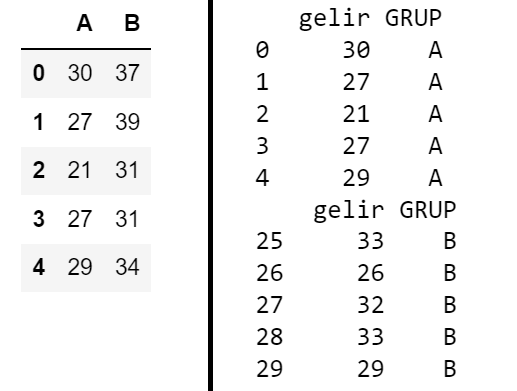

İlkinde eski sistem ve yeni sisteme ait gelir bilgileri hangi gruba ait oldukları sütun ismi olarak belirtilip yanyana verilmiş. İkincisinde eski ve yeni sistem ayrı gruplar halinde verilmiş (Tek bir gelir ve tek bir grup sütunu var).

#### 1. Veri Tipi

In [1]:
import pandas as pd
import numpy as np

In [2]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


#### 2. Veri Tipi

In [3]:
np.arange(len(A))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [4]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A)) # A'nın içerisinde yer alan sayı kadar GRUP_A oluşturuyor.
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A" # grubun içerisindeki tüm değerleri A yapıyor.
A = pd.concat([A, GRUP_A], axis = 1)  

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tüm veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


**Verinin mevcut yapısını görselleştiriyoruz.**

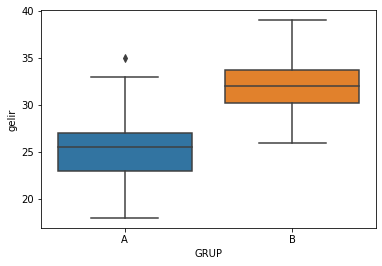

In [5]:
import seaborn as sns

sns.boxplot(x = "GRUP", y = "gelir", data=AB);

Görünen o ki, B grubunun daha yukarıda olduğu gözleniyor. Ama bunun gerçekten istatistiki olarak anlamlı bir farklılık olup olmadığını bilmiyoruz. Şans eseri oluşup oluşmadığını bilmiyoruz. Bu sebeple testini yapmış olacağız. 

### <font color='blue'> Varsayım Kontrolü</font>

Önceki bölümde iki farklı veri tipi oluşturmuştuk. 

In [6]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [7]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


#### <font color='purple'> 1. Normallik Varsayımı </font>

Normallik varsayımı için **Shapiro-Wilks** testini kullanacağız.

````
H0: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık vardır.

````
Bu hipotezin sonucunda H0'ı reddetmememiz lazım. 

Shapiro testinin içerisine ilgilendiğimiz değişkeni yazdığımızda bu değişkenin normal dağılım varsayımını sağlayıp sağlamadığını ifade etmiş olacak. Shapiro bizden sadece değişkenin kendisini bekliyor. Bu sebeple görmüş olduğunuz ikinci veri yapısını burada tek başına kullanamıyoruz. Bundan dolayı oluşturmuş olduğumuz ilk veri oluşturma şekli içerisinden bunu çağırmamız gerekiyor.

A_B içerisinden A değişkenini çağırıp çalıştırdığımızda bunun için normallik testini gerçekleştirecek.

In [8]:
from scipy.stats import shapiro

In [9]:
shapiro(A_B["A"])

(0.9789242148399353, 0.7962799668312073)

In [10]:
shapiro(A_B["B"])

(0.9561260342597961, 0.24584221839904785)

Shapiro Wilksin H0 hipotezi örnek dağılımıyla teorik normal dağılım arasında fark yoktur diyordu. Fark yoktur diyen H0 hipotezini reddedememişiz. Her iki veri seti için de p-value değeri 0.05'ten küçük değil. İkisinin de normal dağıldığını söyleyebiliriz. İki grup için de normallik varsayımı sağlanmaktadır.

#### <font color='purple'> 2. Varyans Homojenliği Varsayımı </font>

Varyans homojenliği varsayımı için **Levene** testini kullanacağız.

````
H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

````

Levene testini yapmak için grupları A ve B olacak şekilde bir arada göstermek gerekiyor. 

In [12]:
import scipy

In [13]:
scipy.stats.levene(A_B["A"], A_B["B"])

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

Test sonuçları yine alışık olduğumuz bir formda sunulmuş. Sol taraftaki levene test istatistiğini, sağ taraftaki ise p-value değerini veriyor.p-value 0.05'ten küçük olmadığı için H0 hipotezini yani varyansların homojen olduğu hipotezini reddedemiyoruz.

Bu şekilde varyansların homojenliği varsayımını da test etmiş olduk.

### <font color='blue'>Bağımsız İki Örneklem T Testi Uygulama</font>

Bağımsız İki Örneklem T Testinin hipotezini test etmiş olacağız.

In [16]:
from scipy import stats

In [17]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)

# varyans homojenliği varsayımının sağlanıp sağlanmadığını ifade etmemiz gerekiyor. 
# Testini yaptık biz bu sağlanıyor diyoruz equal_var=True ile.

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

Buradaki e'li ifade dikkatinizi çekmiş olabilir. Şöyle farklı bir çıktı da alabiliriz:

In [24]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


Sonuçlar incelenecek olursa p-value değeri 0.05'ten küçük olduğundan dolayı ortalamaların aynı olduğunu iddia eden H0 hipotezi reddedilir. Eski sistem ile yeni sistem arasında gelirler göz önünde bulundurulduğunda anlamlı bir farklılık vardır yorumu yapabiliriz ve bu fark yeni sistemin lehinedir. Çünkü ortalamalarını incelediğimizde zaten biz bu durumu gözlemlemiştik. B grubu yani yeni grubun ortalaması daha yukarıdaydı. Fark varsa tabi ki bunun lehine göre olacaktır şeklinde yorumluyoruz.  

## Nonparametrik Bağımsız İki Örneklem T Testi

#### <font color='blue'>MannWhitneyu Testi  </font>

Varsayalım ki önceki bölümde gerçekleştirmiş olduğumuz iki tane varsayım testlerinin sonuçları negatif oldu. Yani hem normallik varsayımı sağlanmıyor, hem de varyans homojenliği varsayımları sağlanmıyor. Bu durumda bu varsayımların sağlanmadığı durumda kullanılacak olan nonparametrik testimizin ismi **mannwhitneyu** testi. Bunu stats içerisinden alabiliyoruz.

In [18]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [20]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


p-value 0.05'ten çok küçük dolayısıyla ortalamaların eşit olduğunu söylediğimiz H0 hipotezini reddediyoruz. Buradaki senaryomuzda hem parametrik yaklaşımla hem nonparametrik yaklaşımla iki örneklem testinde anlamlı sonuçlara yani fark vardır sonucuna ulaşmış olduk. 